In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
# Data sources:
# https://datahub.io/sports-data/spanish-la-liga
# https://datahub.io/sports-data/german-bundesliga
# https://datahub.io/sports-data/english-premier-league
# https://datahub.io/sports-data/french-ligue-1
# https://datahub.io/sports-data/italian-serie-a

In [3]:
# Data explanation

# 'Div',League Division 
# 'Date', Match Date (dd/mm/yy)
# 'HomeTeam', 
# 'AwayTeam', 
# 'FTHG', Full Time Home Team Goals
# 'FTAG', Full Time Away Team Goals
# 'FTR', Full Time Result (H=Home Win, D=Draw, A=Away Win)
# 'HTHG', Half Time Home Team Goals
# 'HTAG',  Half Time Away Team Goals
# 'HTR', Half Time Result (H=Home Win, D=Draw, A=Away Win)
# 'HS', Home Team Shots
# 'AS', Away Team Shots
# 'HST', Home Team Shots on Target
# 'AST', Away Team Shots on Target
# 'HF', Home Team Fouls Committed
# 'AF', Away Team Fouls Committed
# 'HC', Home Team Corners
# 'AC', Away Team Corners
# 'HY', Home Team Yellow Cards
# 'AY', Away Team Yellow Cards
# 'HR', Home Team Red Cards
# 'AR', Away Team Red Cards
# 'B365H', Bet365 home win odds
# 'B365D', Bet365 draw odds
# 'B365A', Bet365 away win odds
# 'BWH', 'BWD', 'BWA', 'IWH','IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD',
#        'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA',
#        'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh',
#        'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'

### Import and Concatenate data

In [4]:
season_list = ['0910','1011','1112','1213','1314','1415','1516','1617','1718','1819']
season_name_dict = {'0910':'2009-10','1011':'2010-11','1112':'2011-12',
                    '1213':'2012-13','1314':'2013-14','1415':'2014-15',
                    '1516':'2015-16','1617':'2016-17','1718':'2017-18',
                    '1819':'2018-19'}

In [5]:
#Concatenate Spanish La Liga Datasets
esp_combo_df = pd.read_csv('Football_Data/spanish-la-liga_zip/archive/season-' + season_list[0] + '.csv')
esp_combo_df['Season'] = season_list[0]

esp_season_dates_dict = {season_list[0] : [pd.to_datetime(esp_combo_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(esp_combo_df['Date'], dayfirst=True).max()]}
esp_season_teams_dict = {season_list[0] : pd.unique(esp_combo_df[['HomeTeam', 'AwayTeam']].values.ravel())}

for season in season_list[1:]:
    temp_df = pd.read_csv('Football_Data/spanish-la-liga_zip/archive/season-' + season + '.csv')
    temp_df['Season'] = season
    esp_combo_df = esp_combo_df.append(temp_df,ignore_index=True,sort=False)
    
    esp_season_dates_dict[season] = [pd.to_datetime(temp_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(temp_df['Date'], dayfirst=True).max()]
    esp_season_teams_dict[season] = pd.unique(temp_df[['HomeTeam', 'AwayTeam']].values.ravel())
    
    
esp_combo_df['Date'] = pd.to_datetime(esp_combo_df['Date'], dayfirst=True)
esp_combo_df=esp_combo_df.set_index('Date')

In [6]:
#Concatenate German Bundesliga Datasets
ger_combo_df = pd.read_csv('Football_Data/german-bundesliga_zip/archive/season-' + season_list[0] + '.csv')
ger_combo_df['Season'] = season_list[0]

ger_season_dates_dict = {season_list[0] : [pd.to_datetime(ger_combo_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(ger_combo_df['Date'], dayfirst=True).max()]}
ger_season_teams_dict = {season_list[0] : pd.unique(ger_combo_df[['HomeTeam', 'AwayTeam']].values.ravel())}

for season in season_list[1:]:
    temp_df = pd.read_csv('Football_Data/german-bundesliga_zip/archive/season-' + season + '.csv')
    temp_df['Season'] = season
    ger_combo_df = ger_combo_df.append(temp_df,ignore_index=True,sort=False)
    
    ger_season_dates_dict[season] = [pd.to_datetime(temp_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(temp_df['Date'], dayfirst=True).max()]
    ger_season_teams_dict[season] = pd.unique(temp_df[['HomeTeam', 'AwayTeam']].values.ravel())

ger_combo_df['Date'] = pd.to_datetime(ger_combo_df['Date'], dayfirst=True)
ger_combo_df=ger_combo_df.set_index('Date')

In [7]:
#Concatenate English Premier League Datasets
eng_combo_df = pd.read_csv('Football_Data/english-premier-league_zip/archive/season-' + season_list[0] + '.csv')
eng_combo_df['Season'] = season_list[0]

eng_season_dates_dict = {season_list[0] : [pd.to_datetime(eng_combo_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(eng_combo_df['Date'], dayfirst=True).max()]}
eng_season_teams_dict = {season_list[0] : pd.unique(eng_combo_df[['HomeTeam', 'AwayTeam']].values.ravel())}

for season in season_list[1:]:
    temp_df = pd.read_csv('Football_Data/english-premier-league_zip/archive/season-' + season + '.csv')
    temp_df['Season'] = season
    eng_combo_df = eng_combo_df.append(temp_df,ignore_index=True,sort=False)
    
    eng_season_dates_dict[season] = [pd.to_datetime(temp_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(temp_df['Date'], dayfirst=True).max()]
    eng_season_teams_dict[season] = pd.unique(temp_df[['HomeTeam', 'AwayTeam']].values.ravel())
    
eng_combo_df['Date'] = pd.to_datetime(eng_combo_df['Date'], dayfirst=True)
eng_combo_df=eng_combo_df.set_index('Date')

In [8]:
#Concatenate French Ligue 1 Datasets
fra_combo_df = pd.read_csv('Football_Data/french-ligue-1_zip/archive/season-' + season_list[0] + '.csv')
fra_combo_df['Season'] = season_list[0]

fra_season_dates_dict = {season_list[0] : [pd.to_datetime(fra_combo_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(fra_combo_df['Date'], dayfirst=True).max()]}
fra_season_teams_dict = {season_list[0] : pd.unique(fra_combo_df[['HomeTeam', 'AwayTeam']].values.ravel())}

for season in season_list[1:]:
    temp_df = pd.read_csv('Football_Data/french-ligue-1_zip/archive/season-' + season + '.csv')
    temp_df['Season'] = season
    fra_combo_df = fra_combo_df.append(temp_df,ignore_index=True,sort=False)
    
    fra_season_dates_dict[season] = [pd.to_datetime(temp_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(temp_df['Date'], dayfirst=True).max()]
    fra_season_teams_dict[season] = pd.unique(temp_df[['HomeTeam', 'AwayTeam']].values.ravel())

fra_combo_df['Date'] = pd.to_datetime(fra_combo_df['Date'], dayfirst=True)
fra_combo_df=fra_combo_df.set_index('Date')

In [9]:
#Concatenate Italian Serie A Datasets
ita_combo_df = pd.read_csv('Football_Data/italian-serie-a_zip/archive/season-' + season_list[0] + '.csv')
ita_combo_df['Season'] = season_list[0]

ita_season_dates_dict = {season_list[0] : [pd.to_datetime(ita_combo_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(ita_combo_df['Date'], dayfirst=True).max()]}
ita_season_teams_dict = {season_list[0] : pd.unique(ita_combo_df[['HomeTeam', 'AwayTeam']].values.ravel())}

for season in season_list[1:]:
    temp_df = pd.read_csv('Football_Data/italian-serie-a_zip/archive/season-' + season + '.csv')
    temp_df['Season'] = season
    ita_combo_df = ita_combo_df.append(temp_df,ignore_index=True,sort=False)
    
    ita_season_dates_dict[season] = [pd.to_datetime(temp_df['Date'], dayfirst=True).min(),
                                          pd.to_datetime(temp_df['Date'], dayfirst=True).max()]
    ita_season_teams_dict[season] = pd.unique(temp_df[['HomeTeam', 'AwayTeam']].values.ravel())
    
ita_combo_df['Date'] = pd.to_datetime(ita_combo_df['Date'], dayfirst=True)
ita_combo_df=ita_combo_df.set_index('Date')

In [10]:
esp_team_list = pd.unique(esp_combo_df[['HomeTeam', 'AwayTeam']].dropna().values.ravel())
ger_team_list = pd.unique(ger_combo_df[['HomeTeam', 'AwayTeam']].dropna().values.ravel())
eng_team_list = pd.unique(eng_combo_df[['HomeTeam', 'AwayTeam']].dropna().values.ravel())
fra_team_list = pd.unique(fra_combo_df[['HomeTeam', 'AwayTeam']].dropna().values.ravel())
ita_team_list = pd.unique(ita_combo_df[['HomeTeam', 'AwayTeam']].dropna().values.ravel())

### Calculate Cumulative Wins-Draws-Losses

In [11]:
def winloss_calc(team, HomeTeam, AwayTeam, FTR):
    if (HomeTeam == team) and (FTR == 'H'):
        return 1
    elif (HomeTeam == team) and (FTR == 'A'):
        return -1
    elif (AwayTeam == team) and (FTR == 'A'):
        return 1
    elif (AwayTeam == team) and (FTR == 'H'):
        return -1
    else:
        return 0

In [12]:
#Find max and min dates over all five leagues
start_date = min([esp_combo_df.index.min(), ger_combo_df.index.min(),
                 eng_combo_df.index.min(), fra_combo_df.index.min(),
                 ita_combo_df.index.min()])
end_date = max([esp_combo_df.index.max(), ger_combo_df.index.max(),
                 eng_combo_df.index.max(), fra_combo_df.index.max(),
                 ita_combo_df.index.max()])

In [13]:
ger_summ_df = pd.DataFrame()
ger_summ_df['Date']=pd.date_range(start_date, end_date)
eng_summ_df = pd.DataFrame()
eng_summ_df['Date']=pd.date_range(start_date, end_date)
fra_summ_df = pd.DataFrame()
fra_summ_df['Date']=pd.date_range(start_date, end_date)
ita_summ_df = pd.DataFrame()
ita_summ_df['Date']=pd.date_range(start_date, end_date)

In [14]:
def create_summ_df(team_list, combo_df, season_dates_dict, season_teams_dict, start_date, end_date):
    summ_df = pd.DataFrame(pd.date_range(start_date, end_date), columns=['Date']).set_index('Date')
    for team in team_list:
        temp_df = combo_df.where((combo_df['HomeTeam']==team) | (combo_df['AwayTeam']==team))\
                    .dropna(subset=['HomeTeam'])[['Season', 'HomeTeam', 'AwayTeam', 'FTR']]
        temp_df[team + '_WDL'] = temp_df.apply(lambda x: winloss_calc(team, x['HomeTeam'],
                                                                           x['AwayTeam'], x['FTR']), axis=1)
        temp_df[team] = temp_df[team + '_WDL'].cumsum()

        summ_df = pd.merge_ordered(summ_df, temp_df[team], 
                         how='outer',left_on='Date', right_on='Date',
                         fill_method='ffill').set_index('Date')

        for ii, season in enumerate(season_list):
            end_of_last_season = season_dates_dict[season_list[max(0,ii-1)]][1]
            start_of_next_season = season_dates_dict[season_list[min(len(season_list)-1,ii+1)]][0]

            if ii == len(season_list) -1:
                start_of_next_season = end_date

            if team not in season_teams_dict[season]:
                summ_df.loc[end_of_last_season:start_of_next_season, team] = np.nan
                
    return summ_df

In [15]:
print('esp')
esp_summ_df = create_summ_df(esp_team_list, esp_combo_df, esp_season_dates_dict, 
                             esp_season_teams_dict, start_date, end_date)

print('ger')
ger_summ_df = create_summ_df(ger_team_list, ger_combo_df, ger_season_dates_dict, 
                             ger_season_teams_dict, start_date, end_date)

print('eng')
eng_summ_df = create_summ_df(eng_team_list, eng_combo_df, eng_season_dates_dict, 
                             eng_season_teams_dict, start_date, end_date)

print('fra')
fra_summ_df = create_summ_df(fra_team_list, fra_combo_df, fra_season_dates_dict, 
                             fra_season_teams_dict, start_date, end_date)

print('ita')
ita_summ_df = create_summ_df(ita_team_list, ita_combo_df, ita_season_dates_dict, 
                             ita_season_teams_dict, start_date, end_date)

esp
ger
eng
fra
ita


In [16]:
max_cumWLD = max(esp_summ_df.fillna(0).values.max(),ger_summ_df.fillna(0).values.max(),
                 eng_summ_df.fillna(0).values.max(),fra_summ_df.fillna(0).values.max(),
                 ita_summ_df.fillna(0).values.max())
min_cumWLD = min(esp_summ_df.fillna(0).values.min(),ger_summ_df.fillna(0).values.min(),
                 eng_summ_df.fillna(0).values.min(),fra_summ_df.fillna(0).values.min(),
                 ita_summ_df.fillna(0).values.min())

In [17]:
esp_top_five = esp_summ_df.loc[end_date].dropna().sort_values(ascending=False)[0:5].index
ger_top_five = ger_summ_df.loc[end_date].dropna().sort_values(ascending=False)[0:5].index
eng_top_five = eng_summ_df.loc[end_date].dropna().sort_values(ascending=False)[0:5].index
fra_top_five = fra_summ_df.loc[end_date].dropna().sort_values(ascending=False)[0:5].index
ita_top_five = ita_summ_df.loc[end_date].dropna().sort_values(ascending=False)[0:5].index

### Set colors for the top five teams of each league

In [18]:
esp_top_five, ger_top_five, eng_top_five, fra_top_five, ita_top_five

(Index(['Barcelona', 'Real Madrid', 'Ath Madrid', 'Valencia', 'Sevilla'], dtype='object'),
 Index(['Bayern Munich', 'Dortmund', 'Leverkusen', 'Schalke 04', 'RB Leipzig'], dtype='object'),
 Index(['Man City', 'Man United', 'Chelsea', 'Arsenal', 'Tottenham'], dtype='object'),
 Index(['Paris SG', 'Lyon', 'Marseille', 'Monaco', 'Lille'], dtype='object'),
 Index(['Juventus', 'Napoli', 'Roma', 'Milan', 'Inter'], dtype='object'))

In [19]:
# Team colors from: 
# -SchemeColor, www.schemecolor.com, or
# -logos from Wikimedia processed through www.imagecolorpicker.com

# [OUTER, INNER]

esp_color_dict = {'Barcelona': ['#004C99', '#A70042'],    #Blue, Maroon 
                  'Real Madrid': ['#00529F', '#FEBE10'],  #Red, Blue
                  'Ath Madrid': ['#252E66', '#CE3525'],   #Blue, Red 
                  'Valencia': ['#000000', '#FFFFFF'],     #Black, White
                  'Sevilla': ['#CA140E', '#FFFFFF']}      #Red, White

ger_color_dict = {'Bayern Munich' : ['#0066B2', '#DC052D'], #Blue, Red
                  'Dortmund': ['#000000', '#FDE100',],      #Black, Yellow,
                  'Leverkusen': ['#E32221', '#F3E500'],     #Red, Yellow
                  'Schalke 04': ['#004D9D', '#FFFFFF'],     #Blue, White 
                  'RB Leipzig': ['#DE023F', '#001E46']}     #Red, Blue

eng_color_dict = {'Man City' : ['#00285E', '#6CADDF'],    #Dark Blue, Light Blue
                  'Man United' : ['#DA020E', '#FFE500'],  #Crimson, Yellow
                  'Chelsea' : ['#034694', '#ED1C24'],     #Dark Blue, Red
                  'Arsenal' : ['#DB0007','#9C824A'],      #Dark Red, Gold
                  'Tottenham' : ['#0A1C56', '#FFFFFF']}   #Dark Blue, White

fra_color_dict = {'Paris SG' : ['#02416E', '#F30212'],    #Blue, Red 
                  'Lyon' : ['#003B81', '#D3A43F'],        #Blue, Gold 
                  'Marseille' : ['#0C98D6', '#FFFFFF'],   #Blue, White
                  'Monaco' : ['#E11A21', '#C99D1A'],      #Red, Gold
                  'Lille' : ['#EE1811', '#23216A', ]}     #Red, Blue

ita_color_dict = {'Juventus' : ['#000000', '#FFFFFF'],    #Black, White
                  'Napoli' : ['#003C82', '#13A0D6'],      #Dark Blue, Light Blue 
                  'Roma' : ['#99092C', '#FBB901'],        #Crimson, Yellow
                  'Milan' : ['#000000', '#FF0608'],       #Black, Red 
                  'Inter' : ['#1169B1', '#A29261']}       #Blue, Gold

### Plotting

In [20]:
nudge_dict = {'Barcelona' : 0, 'Real Madrid' : 0, 'Ath Madrid' : 0, 'Valencia' : 0, 'Sevilla' : 0,
'Bayern Munich' : 0, 'Dortmund' : 0, 'Leverkusen' : 0, 'Schalke 04' : 5, 'RB Leipzig' : -5,
'Man City' : 0, 'Man United' : 6, 'Chelsea' : -2, 'Arsenal' : 3, 'Tottenham' : -7,
'Paris SG' : 0, 'Lyon' : 0, 'Marseille' : 5, 'Monaco' : 0, 'Lille' : -10,
'Juventus' : 0, 'Napoli' : 0, 'Roma' : 0, 'Milan' : 4, 'Inter' : -4}

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


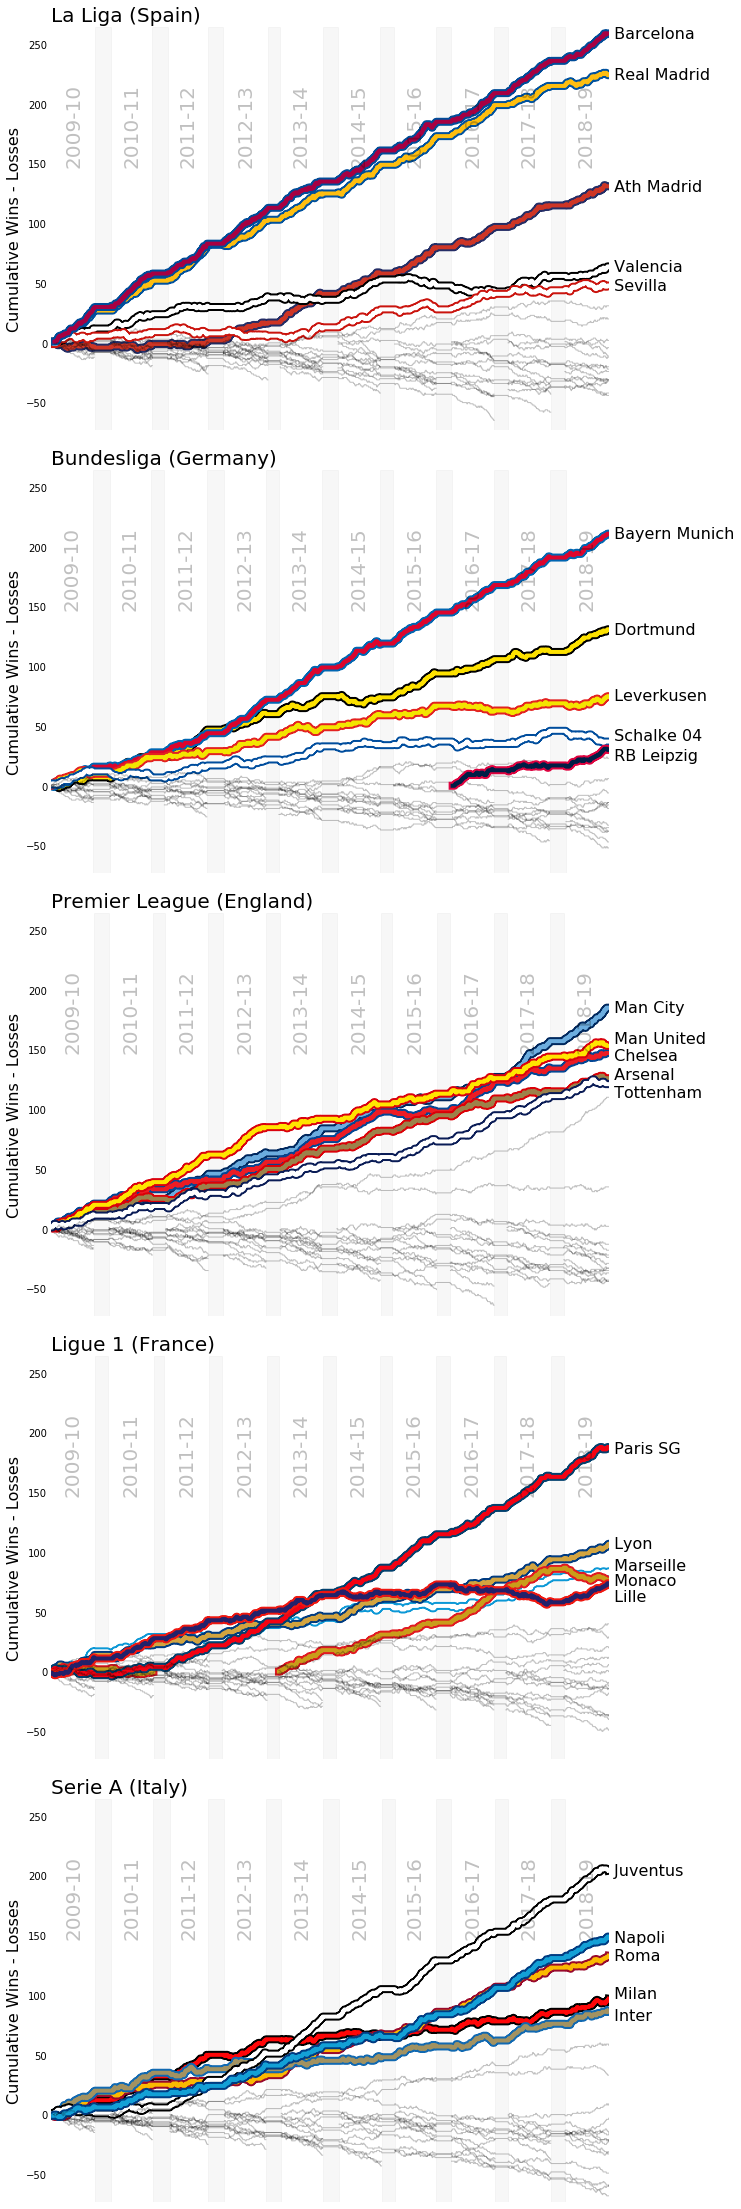

In [21]:
fig = plt.figure(figsize = (10,40))
gs1 = gridspec.GridSpec(5, 1)
gs1.update(hspace=0.1)

axes_list = []
[axes_list.append(plt.subplot(gs1[ii])) for ii in range(0,5)]

# fig.suptitle('The Dominant Teams of Europe', 
#              horizontalalignment='right',
#              verticalalignment='bottom', fontsize=25)
axes_list[0].set_title('La Liga (Spain)', loc='left', fontsize=20)
axes_list[1].set_title('Bundesliga (Germany)', loc='left', fontsize=20)
axes_list[2].set_title('Premier League (England)', loc='left', fontsize=20)
axes_list[3].set_title('Ligue 1 (France)', loc='left', fontsize=20)
axes_list[4].set_title('Serie A (Italy)', loc='left', fontsize=20)

df_list = [esp_summ_df, ger_summ_df, eng_summ_df, fra_summ_df, ita_summ_df]
team_list_list = [esp_team_list, ger_team_list, eng_team_list, fra_team_list, ita_team_list]
top_five_list = [esp_top_five, ger_top_five, eng_top_five, fra_top_five, ita_top_five]
season_dates_dict_list = [esp_season_dates_dict, ger_season_dates_dict, eng_season_dates_dict,
                    fra_season_dates_dict,ita_season_dates_dict] 
color_dict_list = [esp_color_dict, ger_color_dict, eng_color_dict, fra_color_dict, ita_color_dict]


for ii, df in enumerate(df_list):
    team_list = team_list_list[ii]
    axes_list[ii].set_xlim([start_date, end_date])
    axes_list[ii].set_ylim([min_cumWLD-5, max_cumWLD+5])
    axes_list[ii].spines['right'].set_visible(False)
    axes_list[ii].spines['left'].set_visible(False)
    axes_list[ii].spines['top'].set_visible(False)
    axes_list[ii].spines['bottom'].set_visible(False)
    
    axes_list[ii].spines['right'].set_visible(False)
    axes_list[ii].get_xaxis().set_visible(False)
    axes_list[ii].tick_params(axis=u'both', which=u'both',length=0)
    
    axes_list[ii].set_ylabel('Cumulative Wins - Losses', fontsize=16)
    
    # Inter-season bands
    season_dates_dict = season_dates_dict_list[ii]
    for kk, season in enumerate(season_list[:-1]):
        start_of_this_season = season_dates_dict[season][0]
        end_of_this_season = season_dates_dict[season][1]
        start_of_next_season = season_dates_dict[season_list[kk+1]][0]
        axes_list[ii].axvspan(end_of_this_season,
                              start_of_next_season,
                              alpha=0.03, color='k')
    # Season labels   
    for season in season_list:
        start_of_this_season = season_dates_dict[season][0]
        end_of_this_season = season_dates_dict[season][1]
        mid_season = start_of_this_season + (end_of_this_season - start_of_this_season)/2
        axes_list[ii].text(mid_season,150,season_name_dict[season],
                          rotation='vertical', horizontalalignment='center',
                           fontsize=20, alpha=0.25)
        
    # Data and Team Names
    for jj, team in enumerate(team_list):
        
        if team in top_five_list[ii]:
            team_colors = color_dict_list[ii][team]
            axes_list[ii].plot(df.index, df[team], color=team_colors[0], lw=8)
            axes_list[ii].plot(df.index, df[team], color=team_colors[1], lw=4)
            axes_list[ii].text(end_date, df.loc[end_date,team] + nudge_dict[team], ' ' + team, 
                               fontsize=16,verticalalignment='center')
        else:
            axes_list[ii].plot(df.index, df[team], color='k', lw=1, alpha=0.25)

fig.savefig('TopEuroFootballTeams.pdf', bbox_inches='tight')